<a href="https://colab.research.google.com/github/suresh-venkate/Code_Repositories/blob/main/Deep_Learning/Computer_Vision/Image_Classification/MNIST/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset Classification

* Problem statement: Classify hand-written digits into their respective classes.
* Dataset to be used: keras.datasets.mnist

# Connect to Google Drive

In [54]:
### Use this for Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import required libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import os
import shutil
import pytz
import math
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, models, Model
from tensorflow.keras import optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers.schedules import InverseTimeDecay 
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import apply_affine_transform
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Define directory paths

In [56]:
# Define base path for TensorBoard Logs directory
tb_logs_base_path = "/content/drive/MyDrive/AI_ML_Folder/Colab_Directory/Model_Outputs/MNIST_Classification/TB_Logs/"
os.makedirs(tb_logs_base_path, exist_ok = True) # Don't raise any exception if directory exists
# Define base path for storing all outputs related to model / training
out_base_path = "/content/drive/MyDrive/AI_ML_Folder/Colab_Directory/Model_Outputs/MNIST_Classification/Training_Outputs/"
os.makedirs(out_base_path, exist_ok = True) # Don't raise any exception if directory exists

# Dataset - Import, EDA and pre-process

## Import dataset

In [57]:
# Download MNIST dataset
(X_train, y_train), (X_test_orig, y_test_orig) = mnist.load_data()
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_test is {X_test_orig.shape}")

Shape of X_train is (60000, 28, 28)
Shape of X_test is (10000, 28, 28)


## Add channel axis to image arrays

In [58]:
X_train = np.expand_dims(X_train, axis = 3)
X_test_orig = np.expand_dims(X_test_orig, axis = 3)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_test is {X_test_orig.shape}")

Shape of X_train is (60000, 28, 28, 1)
Shape of X_test is (10000, 28, 28, 1)


## Split test set into test and validation sets

In [59]:
# Split test set into test and validation sets
num_val_samp = 1000 # Number of validation set samples to generate
X_test, X_val, y_test, y_val = train_test_split(X_test_orig, y_test_orig,\
                                                test_size = num_val_samp, random_state = 1234)

## Get information about train, val and test datasets

In [60]:
print("Training_Set_Information:")
print("-------------------------")
print("Shape of training set data input is {}" .format(X_train.shape))
print("Number of training data samples is %d" %(X_train.shape[0]))
print("Shape of each training set sample is {}" .format(X_train.shape[1:3]))
print("Shape of training set output is {}" .format(y_train.shape))
print()
print("Validation_Set_Information:")
print("---------------------------")
print("Shape of validation set data input is {}" .format(X_val.shape))
print("Number of validation data samples is %d" %(X_val.shape[0]))
print("Shape of each validation set sample is {}" .format(X_val.shape[1:3]))
print("Shape of validation set output is {}" .format(y_val.shape))
print()
print("Test_Set_Information:")
print("--------------------:")
print("Shape of test set data input is {}" .format(X_test.shape))
print("Number of test data samples is %d" %(X_test.shape[0]))
print("Shape of each test set sample is {}" .format(X_test.shape[1:3]))
print("Shape of test set output is {}" .format(y_test.shape))

Training_Set_Information:
-------------------------
Shape of training set data input is (60000, 28, 28, 1)
Number of training data samples is 60000
Shape of each training set sample is (28, 28)
Shape of training set output is (60000,)

Validation_Set_Information:
---------------------------
Shape of validation set data input is (1000, 28, 28, 1)
Number of validation data samples is 1000
Shape of each validation set sample is (28, 28)
Shape of validation set output is (1000,)

Test_Set_Information:
--------------------:
Shape of test set data input is (9000, 28, 28, 1)
Number of test data samples is 9000
Shape of each test set sample is (28, 28)
Shape of test set output is (9000,)


In [61]:
print("Minimum value of training data samples is %d" %(X_train.min()))
print("Maximum value of training data samples is %d" %(X_train.max()))
print()
print("Minimum value of validation data samples is %d" %(X_val.min()))
print("Maximum value of validation data samples is %d" %(X_val.max()))
print()
print("Minimum value of test data samples is %d" %(X_test.min()))
print("Maximum value of training data samples is %d" %(X_test.max()))
print()

Minimum value of training data samples is 0
Maximum value of training data samples is 255

Minimum value of validation data samples is 0
Maximum value of validation data samples is 255

Minimum value of test data samples is 0
Maximum value of training data samples is 255



<b>Above data indicates that the images are encoded as 28 x 28 grayscale images encoded in 0 to 255 integer format.</b>

## Get class distribution

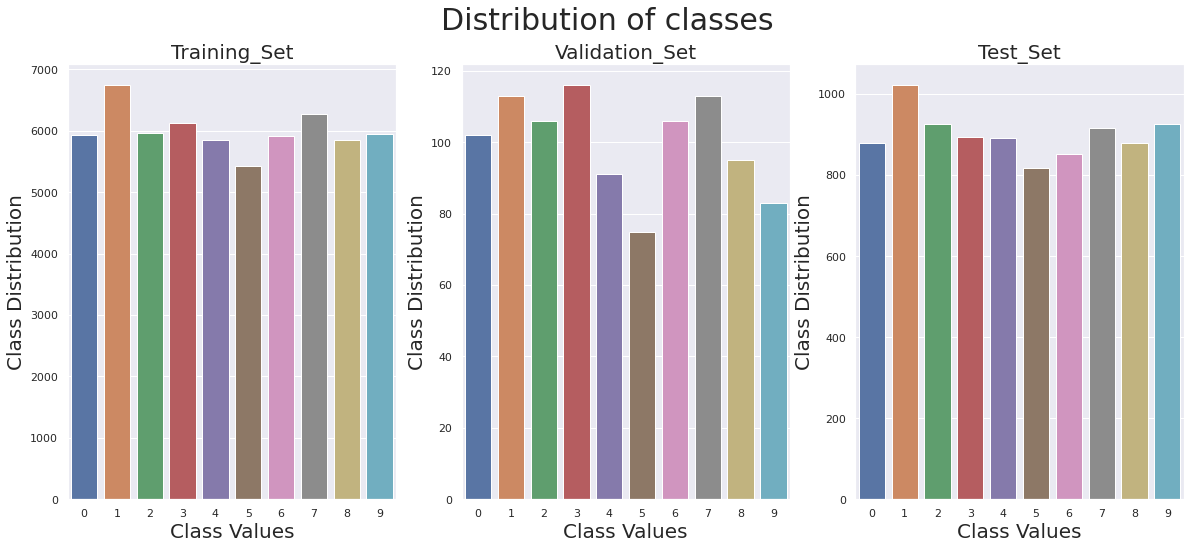

In [62]:
sns.set(color_codes = True)
fig = plt.figure(figsize = (20, 8))
fig.suptitle('Distribution of classes', fontsize = 30)

ax1 = plt.subplot(1, 3, 1)
sns.countplot(y_train)
ax1.set_title('Training_Set', fontsize = 20)
ax1.set_xlabel('Class Values', fontsize = 20)
ax1.set_ylabel('Class Distribution', fontsize = 20)

ax2 = plt.subplot(1, 3, 2)
sns.countplot(y_val)
ax2.set_title('Validation_Set', fontsize = 20)
ax2.set_xlabel('Class Values', fontsize = 20)
ax2.set_ylabel('Class Distribution', fontsize = 20)

ax2 = plt.subplot(1, 3, 3)
sns.countplot(y_test)
ax2.set_title('Test_Set', fontsize = 20)
ax2.set_xlabel('Class Values', fontsize = 20)
ax2.set_ylabel('Class Distribution', fontsize = 20)
plt.show()

<b>Class distribution is reasonably uniform for all three sets.</b>

## Visualize Data

### Training Set

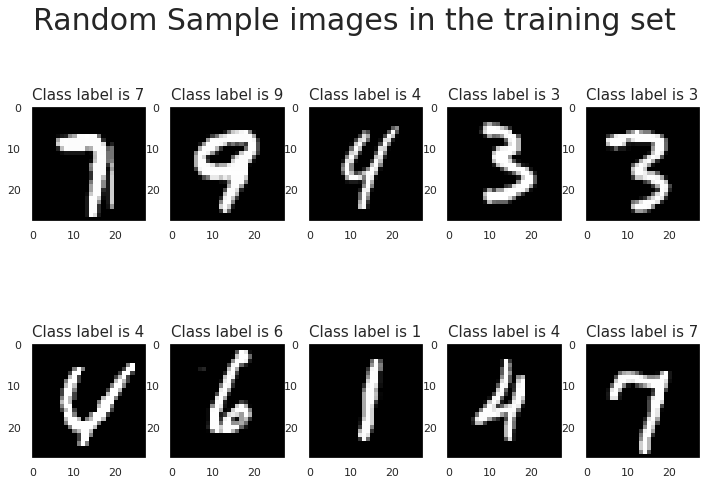

In [63]:
# Plot some random images from the training set along with their class labels
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Random Sample images in the training set', fontsize = 30)

# Generate random sample indices from the training set.
samp_index = np.random.randint(low = 0, high = X_train.shape[0], size = 10).tolist()

for ind, value in enumerate(samp_index):
    ax = plt.subplot(2, 5, (ind + 1))
    plt.imshow(X_train[value, :].squeeze(), cmap = 'gray')
    ax.set_title("Class label is %d" %(y_train[value]), fontsize = 15)
    ax.grid(False)

plt.show()

### Validation Set

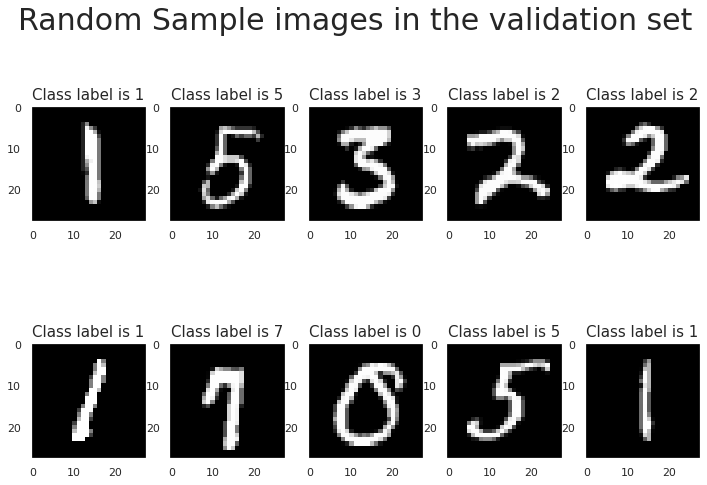

In [64]:
# Plot some random images from the validation set along with their class labels
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Random Sample images in the validation set', fontsize = 30)

# Generate random sample indices from the validation set.
samp_index = np.random.randint(low = 0, high = X_val.shape[0], size = 10).tolist()

for ind, value in enumerate(samp_index):
    ax = plt.subplot(2, 5, (ind + 1))
    plt.imshow(X_val[value, :].squeeze(), cmap = 'gray')
    ax.set_title("Class label is %d" %(y_val[value]), fontsize = 15)
    ax.grid(False)
    
plt.show()

### Test Set

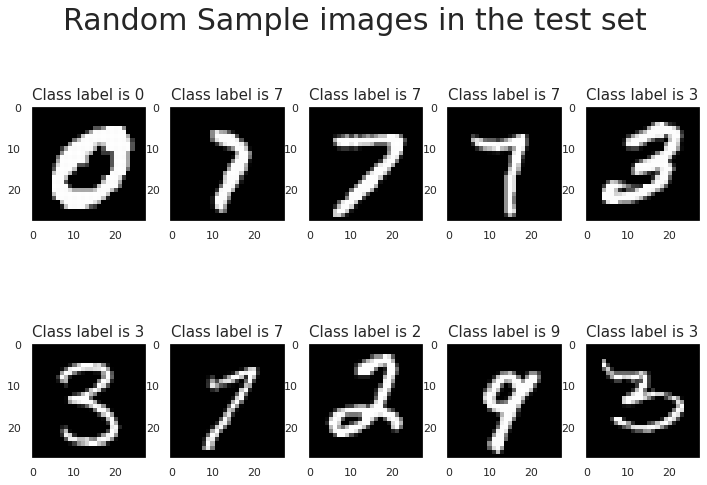

In [65]:
# Plot some random images from the test set along with their class labels
fig = plt.figure(figsize = (12, 8))
fig.suptitle('Random Sample images in the test set', fontsize = 30)

# Generate random sample indices from the test set.
samp_index = np.random.randint(low = 0, high = X_test.shape[0], size = 10).tolist()

for ind, value in enumerate(samp_index):
    ax = plt.subplot(2, 5, (ind + 1))
    plt.imshow(X_test[value, :].squeeze(), cmap = 'gray')
    ax.set_title("Class label is %d" %(y_test[value]), fontsize = 15)
    ax.grid(False)
    
plt.show()

## One-hot encode training, validation and testing labels.

In [66]:
num_classes = 10 # Digits 0 to 9
y_train_ohe = to_categorical(y_train, num_classes = num_classes)
y_val_ohe = to_categorical(y_val, num_classes = num_classes)
y_test_ohe = to_categorical(y_test, num_classes = num_classes)
print("Shape of one-hot encoded training set output is {}" .format(y_train_ohe.shape))
print("Shape of one-hot encoded validation set output is {}" .format(y_val_ohe.shape))
print("Shape of one-hot encoded test set output is {}" .format(y_test_ohe.shape))

Shape of one-hot encoded training set output is (60000, 10)
Shape of one-hot encoded validation set output is (1000, 10)
Shape of one-hot encoded test set output is (9000, 10)


# Define Image Data Generators

## Verify image transformations

In [67]:
img = X_train[0]
img_w_ch_axis = np.expand_dims(img, axis = 2)

img_trans = [] # Empty list to store transformed images
img_trans.append(img_w_ch_axis)

rot = 90 # Clockwise rotation in degrees
wid_shift = 10 # Shift image 10 pixels to the left
hgt_shift = 10 # Shift image 10 pixels upwards

# Rotation only
img_trans.append(apply_affine_transform(img_w_ch_axis, theta = rot))
# Left Shift only
img_trans.append(apply_affine_transform(img_w_ch_axis, tx = wid_shift))
# Right Shift only
img_trans.append(apply_affine_transform(img_w_ch_axis, tx = -wid_shift))

#ty=0, shear=0, zx=1, zy=1, row_axis=0, col_axis=1,



plt.figure(figsize = (8, 8))

ax1 = plt.subplot(1, 3, 1)
ax1.imshow(np.squeeze(img_trans[0]), cmap = 'gray')
ax1.grid(b = False)
ax1.set_title("Original Image")

# ax2 = plt.subplot(1, 3, 2)
# ax2.imshow(img_rot[:, :, 0], cmap = 'gray')
# ax2.grid(b = False)
# ax2.set_title("Rotated Image")

# ax3 = plt.subplot(1, 3, 3)
# ax3.imshow(img_rot[:, :, 0], cmap = 'gray')
# ax3.grid(b = False)
# ax3.set_title("Rotated Image")

plt.show()


RuntimeError: ignored

## Define Image Data Generators

In [69]:
# Define train, val and test ImageDataGenerator objects
# Train ImageDataGenerator included image augmentation
# Val and Test ImageDataGenerators don't have any image augmentation

train_datagen = ImageDataGenerator(rotation_range = 0, horizontal_flip = False, width_shift_range = 0.0,\
                                   height_shift_range = 0.0, shear_range = 0, zoom_range = 0,\
                                   channel_shift_range = 0.0, rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

## Define Generator Objects

In [70]:
mod_bat_size = 64 # Batch size to use for generator objects

# Define train, val and test generator objects
train_generator = train_datagen.flow(X_train, y_train_ohe, batch_size = mod_bat_size,\
                                     shuffle = True, seed = 1234)
val_generator = val_datagen.flow(X_val, y_val_ohe, batch_size = mod_bat_size,\
                                 shuffle = True, seed = 1234)
test_generator = test_datagen.flow(X_test, y_test_ohe, batch_size = mod_bat_size,\
                                   shuffle = True, seed = 1234)

print("Number of batches in train_generator is %d" %(len(train_generator)))
print("Number of batches in val_generator is %d" %(len(val_generator)))
print("Number of batches in test_generator is %d" %(len(test_generator)))

Number of batches in train_generator is 938
Number of batches in val_generator is 16
Number of batches in test_generator is 141


## Visualize the data from generator objects

### Train Generator

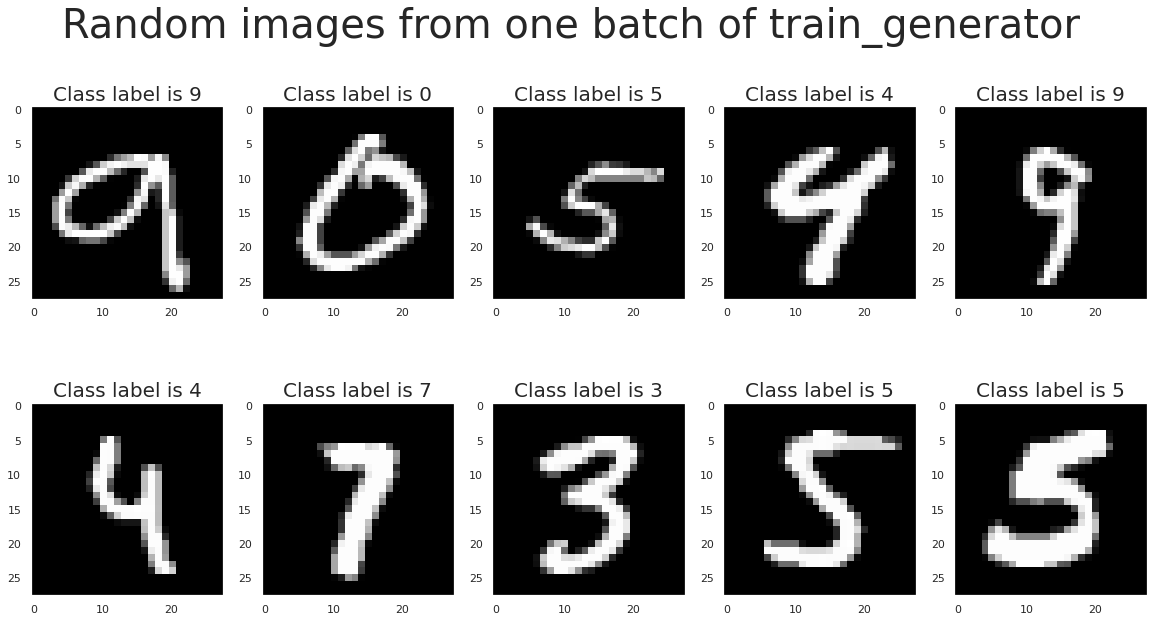

In [74]:
num_images_to_plot = 10 # Number of images to plot
num_cols = 5 # Number of columns to use for plotting
num_rows = math.ceil(num_images_to_plot / num_cols) # Number of rows to use for plotting

# Generate a batch of data
X_batch, y_batch = next(train_generator)

fig, ax = plt.subplots(num_rows, num_cols, figsize = ((num_cols * 4), (num_rows * 5)))
fig.suptitle('Random images from one batch of train_generator', fontsize = 40)

# Generate random sample indices from the batch.
samp_index = np.random.randint(low = 0, high = mod_bat_size, size = num_images_to_plot).tolist()

for ind, value in enumerate(samp_index): # Loop through samp_index
    img = (X_batch[value].copy()).squeeze() # Extract image 
    label = np.argmax(y_batch[value]) # Extract label
    ri = ind // num_cols # Row index
    ci = ind - num_cols * ri # Column index
    ax[ri, ci].imshow(img, cmap = 'gray') # Plot image
    ax[ri, ci].set_title("Class label is %d" %label, fontsize = 20)
    ax[ri, ci].grid(False)  

### Val Generator

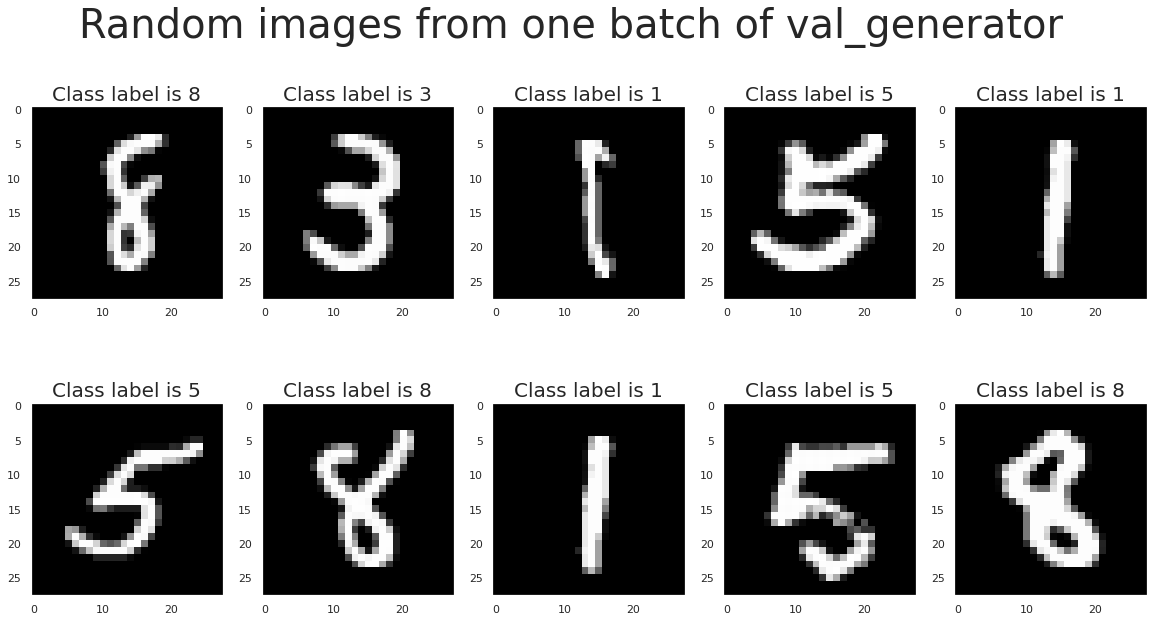

In [75]:
num_images_to_plot = 10 # Number of images to plot
num_cols = 5 # Number of columns to use for plotting
num_rows = math.ceil(num_images_to_plot / num_cols) # Number of rows to use for plotting

# Generate a batch of data
X_batch, y_batch = next(val_generator)

fig, ax = plt.subplots(num_rows, num_cols, figsize = ((num_cols * 4), (num_rows * 5)))
fig.suptitle('Random images from one batch of val_generator', fontsize = 40)

# Generate random sample indices from the batch.
samp_index = np.random.randint(low = 0, high = mod_bat_size, size = num_images_to_plot).tolist()

for ind, value in enumerate(samp_index): # Loop through samp_index
    img = (X_batch[value].copy()).squeeze() # Extract image 
    label = np.argmax(y_batch[value]) # Extract label
    ri = ind // num_cols # Row index
    ci = ind - num_cols * ri # Column index
    ax[ri, ci].imshow(img, cmap = 'gray') # Plot image
    ax[ri, ci].set_title("Class label is %d" %label, fontsize = 20)
    ax[ri, ci].grid(False)  

### Test Generator

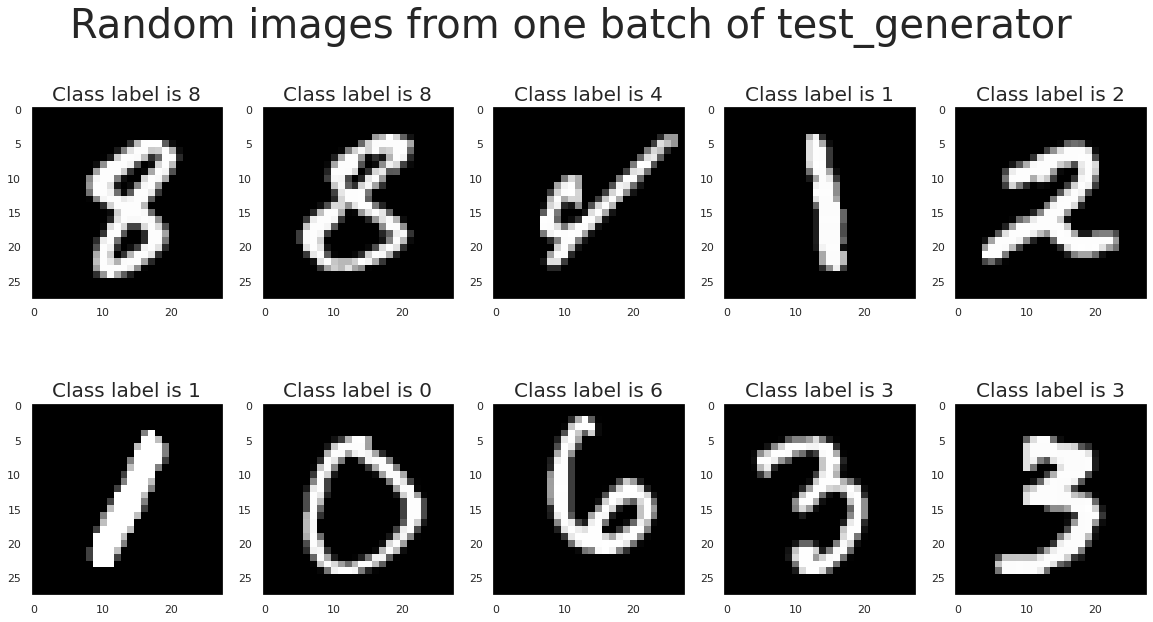

In [76]:
num_images_to_plot = 10 # Number of images to plot
num_cols = 5 # Number of columns to use for plotting
num_rows = math.ceil(num_images_to_plot / num_cols) # Number of rows to use for plotting

# Generate a batch of data
X_batch, y_batch = next(test_generator)

fig, ax = plt.subplots(num_rows, num_cols, figsize = ((num_cols * 4), (num_rows * 5)))
fig.suptitle('Random images from one batch of test_generator', fontsize = 40)

# Generate random sample indices from the batch.
samp_index = np.random.randint(low = 0, high = mod_bat_size, size = num_images_to_plot).tolist()

for ind, value in enumerate(samp_index): # Loop through samp_index
    img = (X_batch[value].copy()).squeeze() # Extract image 
    label = np.argmax(y_batch[value]) # Extract label
    ri = ind // num_cols # Row index
    ci = ind - num_cols * ri # Column index
    ax[ri, ci].imshow(img, cmap = 'gray') # Plot image
    ax[ri, ci].set_title("Class label is %d" %label, fontsize = 20)
    ax[ri, ci].grid(False)  

# Models - Build, Train, Eval

## Functions

### Define Model Core

In [81]:
def model_core(model_dict):
    
    """
    Function to define the model core.
    
    Arguments:
      model_dict - Dictionary with list of keys / values needed to build the model

    Returns:
      model - Model with all layers instantiated
 
    """    
    # Retrieve model dict parameters
    model_arch = model_dict['model_arch'] # Model Architecture
    use_bnorm = model_dict['use_bnorm'] # Boolean, whether to use Batch Norm or not
    use_dropout = model_dict['use_dropout'] # Boolean, whether to use dropout or not
    dropout_rate = model_dict['dropout_rate'] # List containing dropout values for each layer

    ##### Start Model Architecture A
    if (model_arch == 'A'): 
      model = Sequential()

      # Stage-1: Conv2D -> BN -> ReLU -> Dropout -> Conv2D -> BN -> ReLU -> Dropout -> MaxPool2D
      model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), name = 'C1'))
      if (use_bnorm): model.add(BatchNormalization(name = 'B1'))
      model.add(Activation('relu', name = 'A1'))
      if (use_dropout): model.add(Dropout(rate = dropout_rate[0], name = 'DR1'))    
      model.add(Conv2D(32, (3, 3), name = 'C2'))
      if (use_bnorm): model.add(BatchNormalization(name = 'B2'))
      model.add(Activation('relu', name = 'A2'))
      if (use_dropout): model.add(Dropout(rate = dropout_rate[1], name = 'DR2'))    
      model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'M1'))
      
      # Stage-2: Flatten -> Dense(128, ReLU) -> Dense(10, Softmax)
      model.add(Flatten(name = 'F1'))
      model.add(Dense(128, activation = 'relu', name = "D1"))
      model.add(Dense(10, activation = 'softmax', name = "OL"))
  
    ##### End Model Architecture A     
    
    return model

### Verify Model Core

In [82]:
# Verify model defined above
model_dict = {'model_arch': 'A',
              'use_bnorm': True,
              'use_dropout': True, 
              'dropout_rate': [0.0, 0.0]
              }
temp_model = model_core(model_dict)
temp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 26, 26, 32)        320       
_________________________________________________________________
B1 (BatchNormalization)      (None, 26, 26, 32)        128       
_________________________________________________________________
A1 (Activation)              (None, 26, 26, 32)        0         
_________________________________________________________________
DR1 (Dropout)                (None, 26, 26, 32)        0         
_________________________________________________________________
C2 (Conv2D)                  (None, 24, 24, 32)        9248      
_________________________________________________________________
B2 (BatchNormalization)      (None, 24, 24, 32)        128       
_________________________________________________________________
A2 (Activation)              (None, 24, 24, 32)        0

### Define Model_Compile

In [ ]:
def model_compile(model, compile_dict):
    
    """
    Function to compile the model
    
    Arguments:
      model - Model instance that needs to be compiled
      compile_dict - Dictionary with list of keys / values needed to compile the model
 
    """    
    # Retrieve compile_dict parameters
    ilr = compile_dict['ilr'] # Initial learning rate to use for learning rate decay scheduler    
    dr = compile_dict['dr'] # Decay rate to use for learning rate decay scheduler    
    ds = compile_dict['ds'] # Decay step to use for learning rate decay scheduler
    redlr_plat = compile_dict['redlr_plat'] # Boolean: If True, implement reduce LR on plateau     

    lr_sch = InverseTimeDecay(ilr, ds, dr) # Inverse Time Decay LR scheduler
    # Define Optimizer
    if (redlr_plat):
      opt = optimizers.Adam(learning_rate = ilr) 
    else:
      opt = optimizers.Adam(learning_rate = lr_sch)
    loss = losses.CategoricalCrossentropy() # Define loss
    met = metrics.CategoricalAccuracy() # Define metric

    # Compile model
    model.compile(optimizer = opt, loss = loss, metrics = met)

### Define Model_Fit

In [ ]:
def model_fit(model, compile_dict, train_dict):
    
    """
    Function to compile the model
    
    Arguments:
      model - Model instance that needs to be compiled
      compile_dict - Dictionary with list of keys / values needed to compile the model
      train_dict - Dictionary with list of keys / values needed to fit the model      

    Returns:
      model - Final trained model
      hist - Model training history
    """   

    # Retrieve path parameters
    tb_path = train_dict['tb_path'] # Path to store Tensorboard callback information
    mc_path = train_dict['mc_path'] # File name to use for storing model checkpoints
    
    # Retrieve callback parameters
    mcp_freq = train_dict['mcp_freq'] # Number of batches after which model will be checkpointed    
    early_stop = train_dict['early_stop'] # Boolean: If True, implement early stop
    lrpl_fac = train_dict['lrpl_fac'] # Factor to use for Reduce LR on Plateau callback
    lrpl_pat = train_dict['lrpl_pat'] # Patience to use for Reduce LR on Plateau callback    

    # Retrieve training parameters
    train_gen = train_dict['train_gen'] # Train Generator to use while fitting
    val_data = train_dict['val_gen'] # Validation Generator to use while fitting
    epochs = train_dict['epochs'] # Number of epochs to train for
    initial_epoch = train_dict['initial_epoch'] # Initial epoch to re-start training from
    train_steps_per_epoch = train_dict['train_steps_per_epoch'] # Number of steps per training epoch
    val_steps = train_dict['val_steps'] # Number of steps before stopping validation
    val_freq = train_dict['val_freq'] # Number of epochs to run before performing a validation run
    verb = train_dict['verb'] # Boolean: If True, print running summary during model fit.

    #### Start -  Define callbacks
    # Define path for tensorboard logs
    logdir = os.path.join(tb_path,\
                          datetime.datetime.now(pytz.timezone('Asia/Kolkata')).strftime("%d%m_%H%M"))
    # Define Tensorboard callback
    tensorboard_callback = TensorBoard(logdir, histogram_freq = 0)
    # Define Model Checkpoint callback
    mcp_callback = ModelCheckpoint(filepath = mc_path, save_freq = mcp_freq, verbose = 0)
    # Define Early Stopping callback
    earlystopping_callback = EarlyStopping(monitor = "loss", min_delta = 1e-4, patience = 10,\
                                           mode = "min", verbose = 1)
    # Define 'Reduce learning rate on plateau' callback
    redlr_plat_callback = ReduceLROnPlateau(monitor = "val_loss", factor = lrpl_fac, patience = lrpl_pat,\
                                            verbose = 1, mode = "min", min_delta = 0.0001)
    # Define list of all callbacks
    callback_list = []
    if (tb_path != None): callback_list.append(tensorboard_callback)
    if (mc_path != None): callback_list.append(mcp_callback)
    if (early_stop): callback_list.append(earlystopping_callback)    
    if (redlr_plat): callback_list.append(redlr_plat_callback)
    #### End -  Define callbacks 
    
    #### Start - Model Fit
    hist = model.fit(x = train_gen, validation_data = val_data, epochs = epochs,\
                     initial_epoch = initial_epoch, steps_per_epoch = training_steps_per_epoch,\
                     validation_steps = val_steps, validation_freq = val_freq,
                     callbacks = callback_list, verbose = verb)
    #### End - Model Fit   

    return model, hist

### Define Model_Train

In [ ]:
def model_train(model_dict, compile_dict, train_dict):
  """
  Function to instantiate (or load) model, compile and fit model.
    
  Arguments:
    model_dict - Dictionary with list of keys / values needed to build the model
    compile_dict - Dictionary with list of keys / values needed to compile the model
    train_dict - Dictionary with list of keys / values needed to train the model
    
  Returns:
    model - Final trained model
    hist - Model training history
 
  """   
  # Retrieve train_dict parameters
  fit_resume = train_dict['fit_resume'] # Boolean: If True, resume fit from initial epoch
  load_model = train_dict['load_model'] # Boolean: If True, load model from 'fm_path' and resume fit  
  recompile = train_dict['recompile'] # Boolean: If True, recompile model before resuming fit  
  fm_path = train_dict['fm_path'] # File name to use for storing final trained model
  hi_path = train_dict['hi_path'] # File name to use for storing training history

  if (not(fit_resume)): # fit_resume = False => instantiating new model
    print("Instantiating new model...", end = ', ')
    model = model_core(model_dict) # Instantiate new model
    print("Compiling model...", end = ', ')
    model_compile(model, compile_dict) # Compile model
    print("Model Fit started.... ", end = ', ')    
    model, hist = model_fit(model, compile_dict, train_dict) # Fit model
  else: # fit_resume = True => Proceed with existing model in memory or load model from disk
    if (load_model): # load_model = True => Load model from disk
      print("Loading model from disk...", end = ', ')
      model = models.load_model(fm_path) # Reload model from disk
      if (recompile): # Re-compile model if "recompile" = True
        print("Re-Compiling model...", end = ', ')
        model_compile(model, compile_dict) 
      print("Resuming model fit.... ", end = ', ')
      model, hist = model_fit(model, compile_dict, train_dict) # Resume model fit
    else: # load_model = Flase => Proceed with existing model in memory
      if (recompile): # Re-compile model if "recompile" = True
        print("Re-compiling model...", end = ', ')
        model_compile(model, compile_dict)
      print("Resuming model fit.... ", end = ', ')
      model, hist = model_fit(model, compile_dict, train_dict) # Resume model fit

  # Save final trained model and history to file
  if (fm_path != None): model.save(fm_path, overwrite = True, save_format = 'h5') 
  if (hi_path != None): np.save(hi_path, hist.history)

  return model, hist

## Set model_core, model_compile, model_train parameters

In [ ]:
### Define file paths
mod_file_pref = "MA" # Prefix to use for naming files and paths
tb_path = os.path.join(tb_logs_base_dir, mod_file_pref) # Tensorboard base path
fm_path = os.path.join(out_base_path, mod_file_pref + "_finalmodel.h5") # Final trained model path
mc_path = os.path.join(out_base_path, mod_file_pref + "_EP{epoch:04d}.h5") # Model checkpoints path
hi_path = os.path.join(out_base_path, mod_file_pref + "_hist.npy") # Training history path

# Set model_dict values
model_dict = {'model_arch': 'A',
              'use_bnorm': True,
              'use_dropout': True, 
              'dropout_rate': [0.0, 0.0]
              }
# Set compile_dict values
compile_dict = {'ilr': 1e-3, # Initial learning rate to use for learning rate decay scheduler    
                'dr': 1, # Decay rate to use for learning rate decay scheduler
                'ds': (len(train_generator) * 10), # Decay rate to use for learning rate decay scheduler
                'redlr_plat': False, # Boolean: If True, implement reduce LR on plateau  
               }
# Set train_dict values               
train_dict = {'fit_resume': False, # Boolean: If True, resume fit from initial epoch
              'load_model': False, # Boolean: If True, load model from 'fm_path' and resume fit
              'recompile': False, # Boolean: If True, recompile model before resuming fit
              'train_gen': train_generator, # Train generator to use while fitting
              'val_gen': val_generator, # Validation generator to use while fitting
              'epochs': 500, # Number of epochs to train for              
              'initial_epoch': 0, # Initial epoch to start from              
              'train_steps_per_epoch': len(train_generator), # No. of steps per epoch
              'val_steps': len(val_generator), # No. of steps before stopping eval of val set
              'val_freq': 1, # Number of epochs to run before performing a validation run
              'verb': 1, # Boolean: If True, print running summary during model fit.
              'mcp_freq': (len(train_generator) * 500), # Checkpoint model after mcp_freq batches
              'early_stop': False, # Boolean: If True, implement early stop
              'redlr_plat': compile_dict['redlr_plat'] # Boolean: If True, implement reduce LR on plateau
              'lrpl_fac': 0.5, # Factor to use for Reduce LR on Plateau callback
              'lrpl_pat': 10, # Patience to use for Reduce LR on Plateau callback              
              'tb_path': tb_path, # Path to store Tensorboard callback information
              'mc_path': mc_path, # File name to use for storing model checkpoints
              'fm_path': fm_path, # File name to use for storing final trained model
              'hi_path': hi_path, # File name to use for storing training history
              }

## Train Model

In [ ]:
# Get start time of run and display it
start_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))
print("Started at %s" %(start_time.strftime("%H:%M:%S")), end = '; ')

# Instantiate, compile and fit model
model, hist = model_train(model_dict, compile_dict, train_dict)

# Get end time of run and display elapsed time
end_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))
elap_time = ((end_time - start_time).total_seconds())/60
print("\nCompleted at %s. Elapsed time = %0.2f minutes." %(end_time.strftime("%H:%M:%S"), elap_time))

# Backup

## Model_3: CNN_1

* Input shape = (28 x 28 x 1)
* Layers:

    * Conv2D: Filters = 32, Kernel size = (3 x 3). Padding = 'valid', stride = (1 x 1). Output shape = (26 x 26 x 32). 
    * Activation = 'ReLU'
    * Conv2D: Filters = 32, Kernel size = (3 x 3). Padding = 'valid', stride = (1 x 1). Output shape = (24 x 24 x 32)
    * Activation = 'ReLU'
    * Flatten: Output shape = (18432 x 1)
    * Dense: Output shape = (128 x 1)
    * Activation = 'ReLU'
    * Dense: Output shape = (10 x 1)
    * Activation = 'Softmax'


### Function - Model_Core

In [ ]:
def model_core(model_dict):
    
    """
    Function to define the model core.
    
    Arguments:
    model_dict - Dictionary with list of keys / values needed to build the model
      'use_bnorm' - Boolean: If true, use BatchNormalization layer after each hidden layer
      'use_dropout' - Boolean: If true, use dropout after activation of each hidden layer
      'dropout_rate' - Value of dropout rate to use.

    Returns:
    model - Model with all layers instantiated
 
    """    
    # Retrieve model dict parameters
    
    use_bnorm = model_dict['use_bnorm']
    use_dropout = model_dict['use_dropout']
    dropout_rate = model_dict['dropout_rate']

    model = Sequential() # Instantiate Sequential model
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = "valid",\
                     kernel_initializer = HeNormal(seed = 0), input_shape = (28, 28, 1), name = 'C1'))
    if (use_bnorm):
      model.add(BatchNormalization(axis = -1, name = 'B1'))
    model.add(Activation('relu', name = 'A1'))
    if (use_dropout):
      model.add(Dropout(rate = dropout_rate[0], name = 'DR1'))    
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = "valid",\
                     kernel_initializer = HeNormal(seed = 0), name = 'C2'))
    if (use_bnorm):
      model.add(BatchNormalization(axis = -1, name = 'B2'))
    model.add(Activation('relu', name = 'A2'))
    if (use_dropout):
      model.add(Dropout(rate = dropout_rate[1], name = 'DR2'))    
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), name = 'M1'))
    if (use_dropout):
      model.add(Dropout(rate = dropout_rate[2], name = 'DR3'))
    model.add(Flatten(name = 'F1'))
    model.add(Dense(128, activation = 'relu', kernel_initializer = HeNormal(seed = 0),\
                    name = "D1")) # Add output layer
    model.add(Dense(10, activation = 'softmax', kernel_initializer = HeNormal(seed = 0),\
                    name = "OL")) # Add output layer
    return model

In [ ]:
# Verify model defined above
model_dict = {'use_bnorm': True,
              'use_dropout': True, 
              'dropout_rate': [0.2, 0.3, 0.4]
              }
temp_model = model_core(model_dict)
temp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 26, 26, 32)        320       
_________________________________________________________________
B1 (BatchNormalization)      (None, 26, 26, 32)        128       
_________________________________________________________________
A1 (Activation)              (None, 26, 26, 32)        0         
_________________________________________________________________
DR1 (Dropout)                (None, 26, 26, 32)        0         
_________________________________________________________________
C2 (Conv2D)                  (None, 24, 24, 32)        9248      
_________________________________________________________________
B2 (BatchNormalization)      (None, 24, 24, 32)        128       
_________________________________________________________________
A2 (Activation)              (None, 24, 24, 32)        0

### Function - Define model compile, train and eval

In [ ]:
def model_comp_fit_eval(model_dict, train_dict):
    
    """
    Function to compile, fit and evaluate model.
    
    Arguments:
    model_dict - Dictionary with list of keys / values needed to build the model
               - See function model_core for more details
    train_dict - Dictionary with list of keys / values needed to compile and train the model
      'epochs': Number of epochs to train for
      'early_stop': Boolean: If True, implement early stop
      'bat_size': Batch size to use while doing model fit
      'ilr': Initial learning rate to use for learning rate decay scheduler
      'dr': Decay rate to use for learning rate decay scheduler
      'ds': Decay step to use for learning rate decay scheduler
      'verb': Boolean: If True, print running summary during model fit.
      'tb_path': Path to store Tensorboard callback information
      'bm_path': File name to use for storing best model checkpoint
      'fm_path': File name to use for storing final trained model
      'hi_path': File name to use for storing training history

    Returns:
    score - List containing evaluated loss and accuracy on test set
    model - Model instance with trained weights
    hist - Training history object 

    """      
    # Retrieve train_dict parameters
    epochs = train_dict['epochs'] # Number of epochs to train for
    early_stop = train_dict['early_stop'] # Boolean: If True, implement early stop
    bat_size = train_dict['bat_size'] # Batch size to use while doing model fit
    ilr = train_dict['ilr'] # Initial learning rate to use for learning rate decay scheduler
    dr = train_dict['dr'] # Decay rate to use for learning rate decay scheduler
    ds = train_dict['ds'] # Decay step to use for learning rate decay scheduler
    verb = train_dict['verb'] # Boolean: If True, print running summary during model fit.
    tb_path = train_dict['tb_path'] # Path to store Tensorboard callback information
    bm_path = train_dict['bm_path'] # File name to use for storing best model checkpoint
    fm_path = train_dict['fm_path'] # File name to use for storing final trained model
    hi_path = train_dict['hi_path'] # File name to use for storing training history


    # Instantiate model
    model = model_core(model_dict)
    
    # Define learning rate decay schedule
    lr_sch = InverseTimeDecay(ilr, ds, dr)
    # Define Optimizer
    opt = optimizers.Adam(learning_rate = lr_sch) 
    # Define Loss = CategoricalCrossEntropy with default settings
    cce = losses.CategoricalCrossentropy() 
    # Define Metric = Categorical Accuracy
    met = metrics.CategoricalAccuracy()

    # Compile model
    model.compile(optimizer = opt, loss = cce, metrics = met)
    
    # Define path for tensorboard logs
    logdir = os.path.join(tb_path, datetime.datetime.now().strftime("%d_%H_%M_%S"))
    # Define Tensorboard callback
    tensorboard_callback = TensorBoard(logdir, histogram_freq = 0)
    
    # Define Model Checkpoint callback
    mcp_callback = ModelCheckpoint(filepath = bm_path, monitor = "val_loss", save_best_only = True,\
                                   save_weights_only = False, mode = "min", save_freq = "epoch")

    # Define Early Stopping callback
    earlystopping_callback = EarlyStopping(monitor = "loss", min_delta = 1e-4, patience = 30,\
                                           mode = "min", verbose = 1)

    # Define list of all callbacks
    callback_list = []
    if (early_stop):
      callback_list.append(earlystopping_callback)
    if (tb_path != 'None'):
      callback_list.append(tensorboard_callback)
    if (bm_path != 'None'):
      callback_list.append(mcp_callback)

    # Fit model
    hist = model.fit(X_train, y_train_ohe, epochs = epochs, batch_size = bat_size, verbose = verb,\
                     validation_data = (X_val, y_val_ohe), callbacks = callback_list)
        
    # Evaluate model on test set
    score = model.evaluate(X_test, y_test_ohe, batch_size = 1000, verbose = 0)  

    # Save final trained model to file
    if (fm_path != 'None'):
      # Save final trained model in Keras HDF5 format
      model.save(fm_path, overwrite = True, save_format = 'h5') 
    if (hi_path != 'None'):
      # Save training history to file
      np.save(hi_path, hist.history)
    
    return score, model, hist

### Launch Tensorboard

In [ ]:
#%tensorboard --logdir {tb_logs_base_dir}
#%tensorboard --logdir {tb_logs_base_dir}

### Set all model, compile and training parameters

In [ ]:
### Define file paths
# Prefix to use for naming files and paths
mod_file_pref = "M3D" 
# Tensorboard base path
tb_path = os.path.join(tb_logs_base_dir, mod_file_pref) 
# Path for storing final trained model
fm_path = os.path.join(out_base_path, mod_file_pref + "_finalmodel.h5") 
# Path for storing best model (model with lowest validation set loss)
bm_path = os.path.join(out_base_path, mod_file_pref + "_bestmodel.h5")
# Path for storing training history
hi_path = os.path.join(out_base_path, mod_file_pref + "_hist.npy")

# Define model_dict and train_dict
model_dict = {'use_bnorm': True,
              'use_dropout': False,
              'dropout_rate': [0.2, 0.2, 0.2]
              }
train_dict = {'epochs': 1000, # Number of epochs to train for
              'early_stop': True, # Boolean: If True, implement early stop
              'bat_size': 60, # Batch size to use while doing model fit
              'ilr': 0.001, # Initial learning rate to use for learning rate decay scheduler
              'dr': 1, # Decay rate to use for learning rate decay scheduler
              'ds': (850 * 25), # Decay step to use for learning rate decay scheduler
              'verb': 0, # Boolean: If True, print running summary during model fit.
              'tb_path': tb_path, # Path to store Tensorboard callback information
              'bm_path': bm_path, # File name to use for storing best model checkpoint
              'fm_path': fm_path, # File name to use for storing final trained model
              'hi_path': hi_path, # File name to use for storing training history
              }

print(tb_path)
print(bm_path)
print(fm_path)
print(hi_path)

C:/User_Directories/logs/MNIST/M3D
Model_Info/M3D_bestmodel.h5
Model_Info/M3D_finalmodel.h5
Model_Info/M3D_hist.npy


In [ ]:
# Verify model instantiation, loss and compile options
train_dict_temp = {'epochs': 0, # Number of epochs to train for
              'early_stop': True, # Boolean: If True, implement early stop
              'bat_size': 60, # Batch size to use while doing model fit
              'ilr': 0.001, # Initial learning rate to use for learning rate decay scheduler
              'dr': 1, # Decay rate to use for learning rate decay scheduler
              'ds': (850 * 100), # Decay step to use for learning rate decay scheduler
              'verb': 0, # Boolean: If True, print running summary during model fit.
              'tb_path': 'None', # Path to store Tensorboard callback information
              'bm_path': 'None', # File name to use for storing best model checkpoint
              'fm_path': 'None', # File name to use for storing final trained model
              'hi_path': 'None', # File name to use for storing training history
              }

_, temp_model, _ = model_comp_fit_eval(model_dict, train_dict_temp)
display(temp_model.loss)
display(temp_model.optimizer.get_config())
display(temp_model.summary())

### Fit model 

In [ ]:
# Start model fit
print("Model Fit started.... ", end = ', ')
tic = time.process_time() # Set clock timer
score, model, hist = model_comp_fit_eval(model_dict, train_dict)
toc = time.process_time() # Stop clock timer        
print("Completed.... Elapsed time = %0.1f minutes" %((toc - tic)/60))

Model Fit started.... , Epoch 00052: early stopping
Completed.... Elapsed time = 3.5 minutes


### Plot learning curves

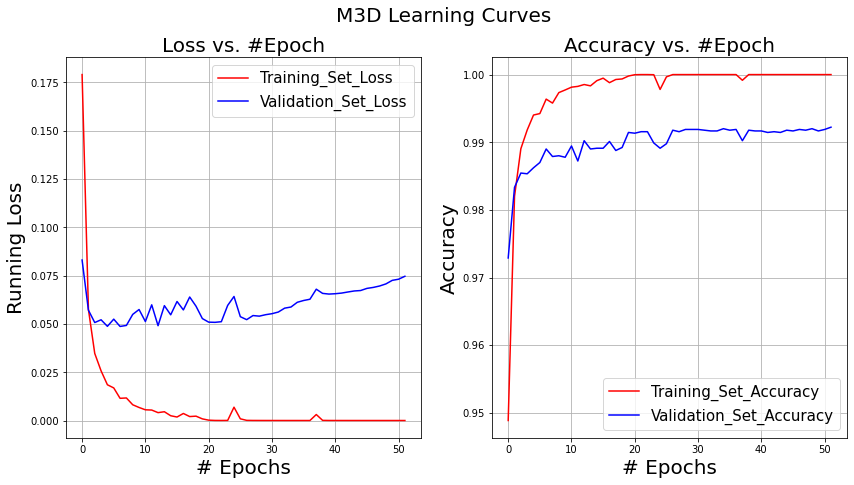

In [ ]:
# Load history files from disk
hist_model = np.load(hi_path, allow_pickle = 'TRUE').item()

# Plot training and validation loss
fig = plt.figure(figsize = (14, 7))
fig.suptitle(mod_file_pref + " Learning Curves", fontsize = 20)
ax1 = plt.subplot(1, 2, 1)
ax1.plot(hist_model['loss'], 'r-', label = 'Training_Set_Loss')
ax1.plot(hist_model['val_loss'], 'b-', label = 'Validation_Set_Loss')
ax1.set_title("Loss vs. #Epoch", fontsize = 20)
ax1.set_ylabel('Running Loss', fontsize = 20)
ax1.set_xlabel('# Epochs', fontsize = 20)
ax1.grid(b = True)
ax1.legend(fontsize = 15)

ax2 = plt.subplot(1, 2, 2)
ax2.plot(hist_model['categorical_accuracy'], 'r-', label = 'Training_Set_Accuracy')
ax2.plot(hist_model['val_categorical_accuracy'], 'b-', label = 'Validation_Set_Accuracy')
ax2.set_title("Accuracy vs. #Epoch", fontsize = 20)
ax2.set_ylabel('Accuracy', fontsize = 20)
ax2.set_xlabel('# Epochs', fontsize = 20)
ax2.grid(b = True)
ax2.legend(fontsize = 15)

#plt.tight_layout()
plt.show()

### Evaluate model on training and test sets

In [ ]:
### Evaluate model with final trained weights

# Load model with final trained weights
model = models.load_model(fm_path) 

# Evaluate model on training set
res = model.evaluate(X_train, y_train_ohe, batch_size = 1000, verbose = 0, return_dict = True)
print("Training set loss is %0.4f" % res['loss'])
print("Training set accuracy is %0.2f %%" % (100 * res['categorical_accuracy']))
print()
# Evaluate model on validation set
res = model.evaluate(X_val, y_val_ohe, batch_size = 1000, verbose = 0, return_dict = True)
print("Validation set loss is %0.4f" % res['loss'])
print("Validation set accuracy is %0.2f %%" % (100 * res['categorical_accuracy']))
print()
# Evaluate model on test set
res = model.evaluate(X_test, y_test_ohe, batch_size = 1000, verbose = 0, return_dict = True)
print("Test set loss is %0.4f" % res['loss'])
print("Test set accuracy is %0.2f %%" % (100 * res['categorical_accuracy']))

Training set loss is 0.0115
Training set accuracy is 99.88 %

Validation set loss is 0.0096
Validation set accuracy is 99.89 %

Test set loss is 0.0665
Test set accuracy is 99.12 %


In [ ]:
### Evaluate model with best weights (corresponding to lowest validation loss)
# Load model corresponding to lowest validation loss
model = models.load_model(bm_path)

# Evaluate model on training set
res = model.evaluate(X_train, y_train_ohe, batch_size = 1000, verbose = 0, return_dict = True)
print("Training set loss is %0.4f" % res['loss'])
print("Training set accuracy is %0.2f %%" % (100 * res['categorical_accuracy']))
print()
# Evaluate model on validation set
res = model.evaluate(X_val, y_val_ohe, batch_size = 1000, verbose = 0, return_dict = True)
print("Validation set loss is %0.4f" % res['loss'])
print("Validation set accuracy is %0.2f %%" % (100 * res['categorical_accuracy']))
print()
# Evaluate model on test set
res = model.evaluate(X_test, y_test_ohe, batch_size = 1000, verbose = 0, return_dict = True)
print("Test set loss is %0.4f" % res['loss'])
print("Test set accuracy is %0.2f %%" % (100 * res['categorical_accuracy']))

Training set loss is 0.0080
Training set accuracy is 99.71 %

Validation set loss is 0.0487
Validation set accuracy is 98.90 %

Test set loss is 0.0472
Test set accuracy is 98.72 %


### Visualize intermediate outputs

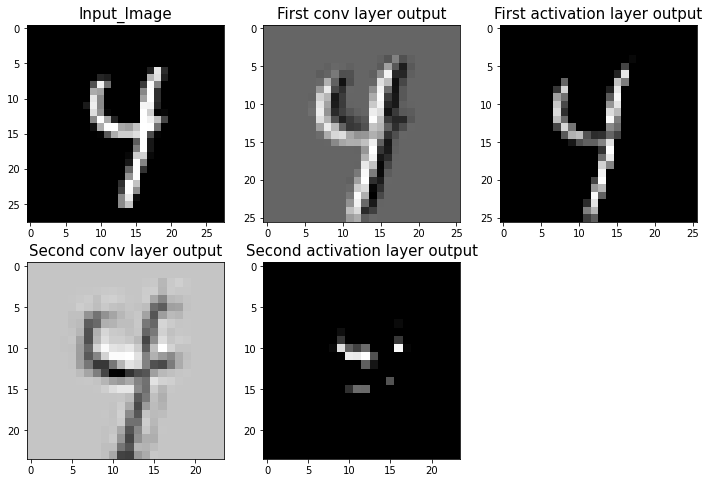

In [ ]:
# Load M3A model
mod_file_pref = "M3B" 
fm_path = os.path.join(out_base_path, mod_file_pref + "_finalmodel.h5")
model = models.load_model(fm_path) 

c1 = model.layers[0] # Extract first conv layer (without activation)
a1 = model.layers[1] # Extract first ReLU activation layer
c2 = model.layers[2] # Extract second conv layer (without activation)
a2 = model.layers[3] # Extract second ReLU activation layer

ind = 20 # Define sample index to evaluate
fil1 = 5 # Define filter of first conv layer to evaluate
fil2 = 7 # Define filter of second conv layer to evaluate

# Define input and outputs of first four layers of model
X = X_train[ind:(ind+1), :, :, :]
X1 = c1(X)
X2 = a1(X1)
X3 = c2(X2)
X4 = a2(X3)

fig = plt.figure(figsize = (12, 8))

ax1 = plt.subplot(2, 3, 1)
ax1.set_title("Input_Image", fontsize = 15)
ax1.imshow(X[0, :, :, 0], cmap = 'gray')

ax2 = plt.subplot(2, 3, 2)
ax2.set_title("First conv layer output", fontsize = 15)
ax2.imshow(X1[0, :, :, fil1], cmap = 'gray')

ax3 = plt.subplot(2, 3, 3)
ax3.set_title("First activation layer output", fontsize = 15)
ax3.imshow(X2[0, :, :, fil1], cmap = 'gray')

ax4 = plt.subplot(2, 3, 4)
ax4.set_title("Second conv layer output", fontsize = 15)
ax4.imshow(X3[0, :, :, fil2], cmap = 'gray')

ax5 = plt.subplot(2, 3, 5)
ax5.set_title("Second activation layer output", fontsize = 15)
ax5.imshow(X4[0, :, :, fil2], cmap = 'gray')

plt.show()

### Confusion matrix

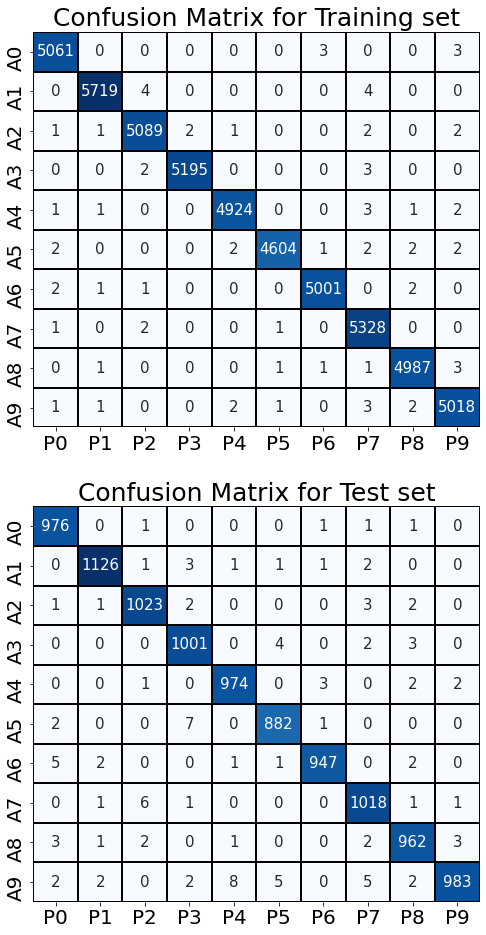

In [ ]:
# Obtain predicted labels for training and testing sets
y_train_pred = model.predict(X_train, batch_size = 1000) # Generate predictions for training set
y_test_pred = model.predict(X_test, batch_size = 1000) # Generate predictions for test set
y_train_pred = np.argmax(y_train_pred, axis = 1) # Convert probabilities to label
y_test_pred = np.argmax(y_test_pred, axis = 1) # Convert probabilities to label

# Generate confusion matrices
cm_train = tf.math.confusion_matrix(y_train, y_train_pred).numpy()
cm_test = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Convert confusion matrices to pandas DF
index = [('A' + str(a)) for a in list(np.unique(y_train).astype(np.int))]
columns = [('P' + str(a)) for a in list(np.unique(y_train).astype(np.int))]
cm_train_df = pd.DataFrame(cm_train, index = index, columns = columns)
cm_test_df = pd.DataFrame(cm_test, index = index, columns = columns)

# Plot confusion matrices
fig = plt.figure(figsize = (8, 16))

ax1 = plt.subplot(2, 1, 1)
sns.heatmap(cm_train_df, annot_kws = {"fontsize": 15}, linewidths = 1,\
            linecolor = 'black', cmap = 'Blues', annot = True ,fmt = 'g',\
            cbar = False, ax = ax1)
ax1.set_title("Confusion Matrix for Training set", fontsize = 25)
ax1.tick_params(labelsize = 20)

ax2 = plt.subplot(2, 1, 2)
sns.heatmap(cm_test_df, annot_kws = {"fontsize": 15}, linewidths = 1,\
            linecolor = 'black', cmap = 'Blues', annot = True ,fmt = 'g',\
            cbar = False, ax = ax2)
ax2.set_title("Confusion Matrix for Test set", fontsize = 25)
ax2.tick_params(labelsize = 20)
plt.show() 

### Make Predictions

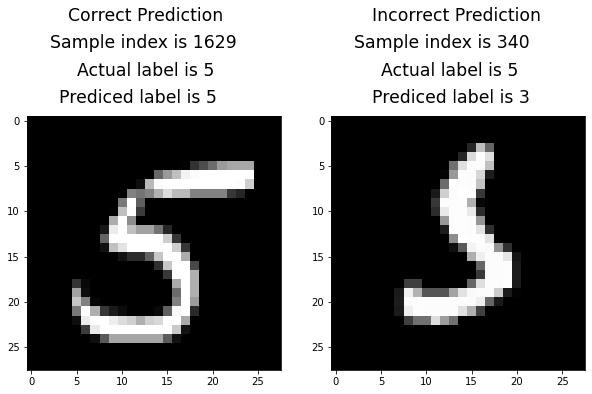

In [ ]:
# Make predictions on the test set for a given label
label = 5 # Actual label for which prediction will be done
act_ind = np.nonzero(y_test == label)[0] # Indices in test set corresponding to above label

# Obtain indices corresponding to correct and incorrect predictions for the given label
incorr_pred_ind = act_ind[np.nonzero(y_test_pred[act_ind] != label)[0]]
corr_pred_ind = np.setdiff1d(act_ind, incorr_pred_ind)

fig = plt.figure(figsize = (10, 5))

# Example of a correct prediction
ax1 = plt.subplot(1, 2, 1)
ind = np.random.choice(corr_pred_ind, 1) # Choose a random index from corr_pred_ind
X = X_test[ind[0], :, :, 0]
plt.imshow(X, cmap = 'gray');
temp = plt.text(4, -11, 'Correct Prediction', fontsize = 'xx-large')
temp = plt.text(2, -8, 'Sample index is %d' % ind[0], fontsize = 'xx-large')
temp = plt.text(5, -5, 'Actual label is %d' % y_test[ind[0]], fontsize = 'xx-large')
temp = plt.text(3, -2, 'Prediced label is %d' % y_test_pred[ind[0]], fontsize = 'xx-large')

# Example of an incorrect prediction
ax2 = plt.subplot(1, 2, 2)
ind = np.random.choice(incorr_pred_ind, 1) # Choose a random index from incorr_pred_ind
X = X_test[ind[0], :, :, 0]
plt.imshow(X, cmap = 'gray');
temp = plt.text(4, -11, 'Incorrect Prediction', fontsize = 'xx-large')
temp = plt.text(2, -8, 'Sample index is %d' % ind[0], fontsize = 'xx-large')
temp = plt.text(5, -5, 'Actual label is %d' % y_test[ind[0]], fontsize = 'xx-large')
temp = plt.text(4, -2, 'Prediced label is %d' % y_test_pred[ind[0]], fontsize = 'xx-large')